## EDA: Portuguese Higher and Secondary Education

This notebook explores the shapes, trends, and relationships of the data present in the modelling tables created from the datasets.

### Imports and reading datasets

In [92]:
import os
import sys
sys.path.insert(0, os.path.abspath('../scripts'))
import maps as mp
import matplotlib.pyplot as plt
import pandas as pd

lower_model_df = pd.read_csv("../../data/results/lower_ed_scored.csv")
higher_model_df = pd.read_csv("../../data/results/higher_ed_scored.csv")

### Box plot of predicted failure risk by real outcome

This box plot shows that students who failed were generally assigned higher predicted failure risk scores, while students who passed received lower scores. The wider spread among failed students suggests that external factors are not a consistent determinant of failure at this stage. In contrast, the tighter distribution for students who passed indicates more stable and lower risk predictions for this group.

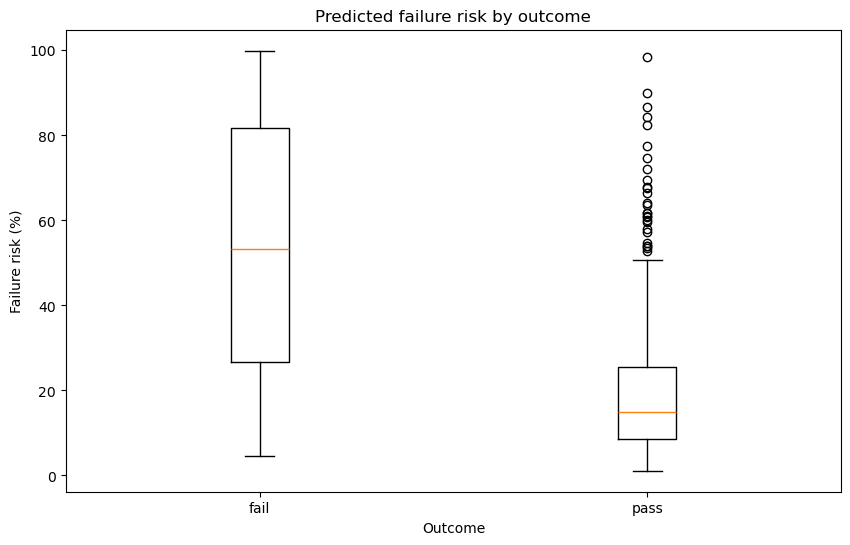

In [93]:
# split data 
fail_df = lower_model_df.loc[lower_model_df["target"] == "fail", "fail_risk"]
pass_df = lower_model_df.loc[lower_model_df["target"] == "pass", "fail_risk"]

# create figure
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(
    [fail_df, pass_df],
    tick_labels=["fail", "pass"],
    showfliers=True
)

ax.set_xlabel("Outcome")
ax.set_ylabel("Failure risk (%)")
ax.set_title("Predicted failure risk by outcome")

plt.show()

### Scatter Plot of external risk and performance risk showing student status by colour

This figure shows the outputs of a separate model for university students, assigning both external and performance risk scores. Graduates are largely concentrated at lower performance risk levels, even where external risk is high. In contrast, dropouts are more frequently associated with higher performance risk scores. Enrolled students display a wider spread across both dimensions, reflecting uncertainty in their eventual outcomes. Overall, performance risk appears to be a stronger differentiator of outcomes than external risk.

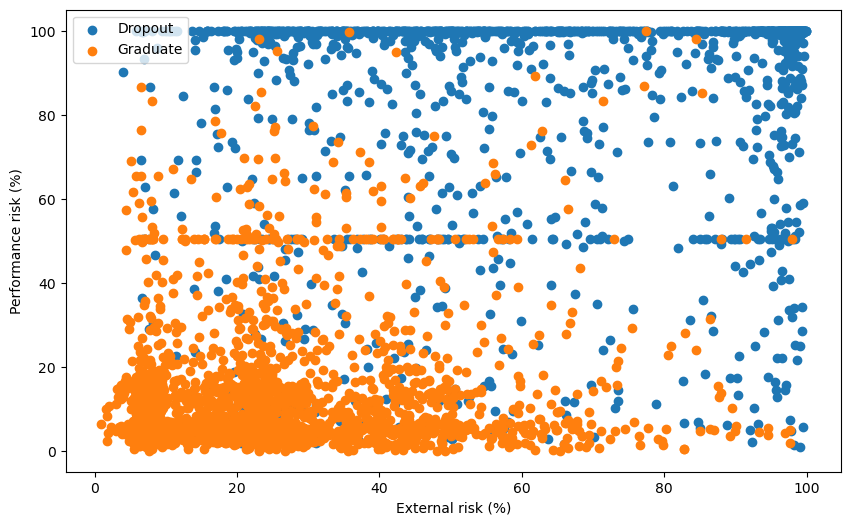

In [94]:
#split axes into 
plt.figure(figsize=(10, 6))
for label in higher_model_df["target"].unique():
    subset = higher_model_df[higher_model_df["target"] == label]
    plt.scatter(
        subset["dropout_risk(external)"],
        subset["dropout_risk(performance)"],
        label=label
    )

#analysing risk on both axis for each student record
plt.xlabel("External risk (%)")
plt.ylabel("Performance risk (%)")
plt.legend()
plt.show()

## Students at Highest and Lowest Risk

In this section, for each of the datasets, the students with the highest and lowest overall risk will be analysed

In [95]:
highest_risk = lower_model_df.loc[lower_model_df["fail_risk"].idxmax()]
lowest_risk = lower_model_df.loc[lower_model_df["fail_risk"].idxmin()]

side_by_side = pd.DataFrame(
    {
        "Highest failure risk": highest_risk,
        "Lowest failure risk": lowest_risk
    }
)

display(side_by_side)

,Highest failure risk,Lowest failure risk
sex,M,F
age,22,18
address,U,U
famsize,GT3,GT3
pstatus,T,T
medu,3,4
fedu,1,4
mjob,services,teacher
fjob,services,teacher
reason,other,reputation


In [96]:
highest_risk = higher_model_df.loc[higher_model_df["dropout_risk(all)"].idxmax()]
lowest_risk = higher_model_df.loc[higher_model_df["dropout_risk(all)"].idxmin()]
highest_external_risk = higher_model_df.loc[higher_model_df["dropout_risk(external)"].idxmax()]
lowest_external_risk = higher_model_df.loc[higher_model_df["dropout_risk(external)"].idxmin()]
highest_performance_risk = higher_model_df.loc[higher_model_df["dropout_risk(performance)"].idxmax()]
lowest_performance_risk = higher_model_df.loc[higher_model_df["dropout_risk(performance)"].idxmin()]

side_by_side = pd.DataFrame(
    {
        "Highest dropout risk": highest_risk,
        "Lowest dropout risk": lowest_risk,
        "Highest external risk" : highest_external_risk,
        "Lowest external risk" : lowest_external_risk,
        "Highest performance risk" : highest_performance_risk,
        "Lowest performance risk" : lowest_performance_risk
    }
)

display(side_by_side)

,Highest dropout risk,Lowest dropout risk,Highest external risk,Lowest external risk,Highest performance risk,Lowest performance risk
marital_status,1,1,1,1,1,1
course,9500,9085,9670,9238,9500,171
daytime/evening_attendance,1,1,1,1,1,1
previous_qualification,1,1,9,1,1,1
previous_qualification_(grade),115.0,110.0,133.1,123.0,133.1,146.0
nacionality,1,25,1,1,1,1
mother's_qualification,3,38,6,19,1,19
father's_qualification,3,38,22,19,1,37
mother's_occupation,2,9,3,191,4,9
father's_occupation,2,6,3,144,10,7


### Analysing insights

#### Insight 3: Students with parents in a higher earning profession (based on student nationality) are less likely to drop out.

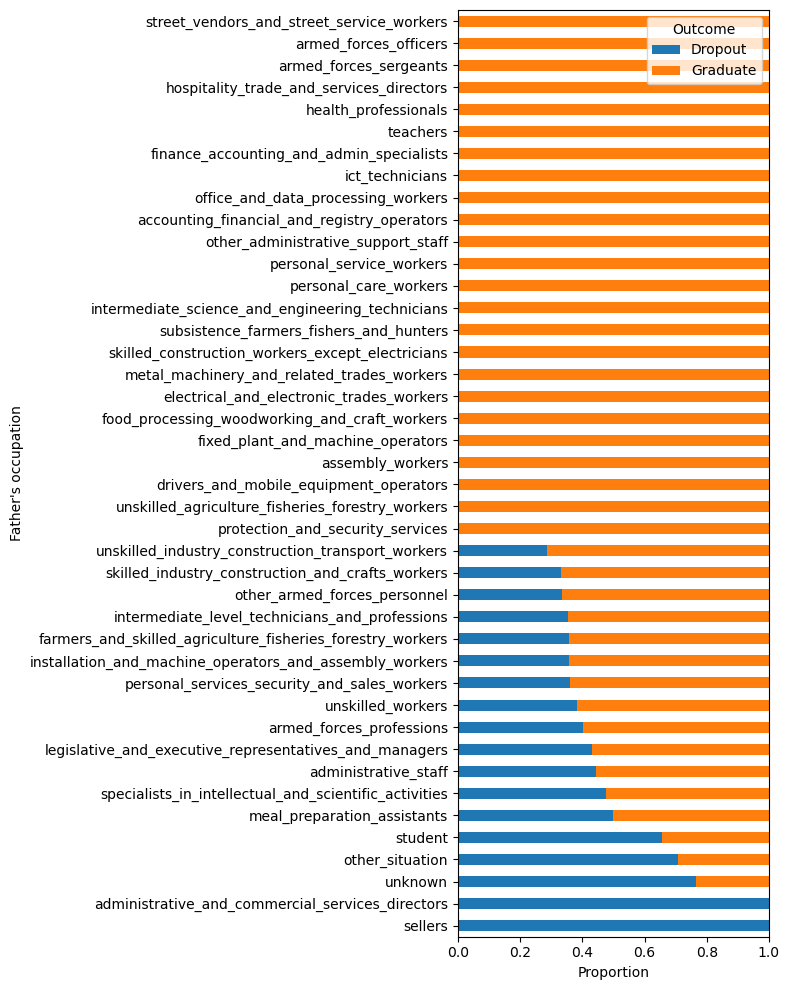

In [97]:
fath_table = (
    higher_model_df
    .groupby(["father's_occupation", "target"])
    .size()
    .div(
        higher_model_df
        .groupby("father's_occupation")
        .size(),
        level=0
    )
    .unstack(fill_value=0)
)

fath_table.index = fath_table.index.map(mp.OCCUPATION)

fath_table = fath_table.sort_values("Dropout", ascending=False)

ax = fath_table.plot(
    kind="barh",
    stacked=True,
    figsize=(8,10)
)

ax.set_xlabel("Proportion")
ax.set_ylabel("Father's occupation")
ax.set_xlim(0, 1)
ax.legend(title="Outcome")

plt.tight_layout()
plt.show()

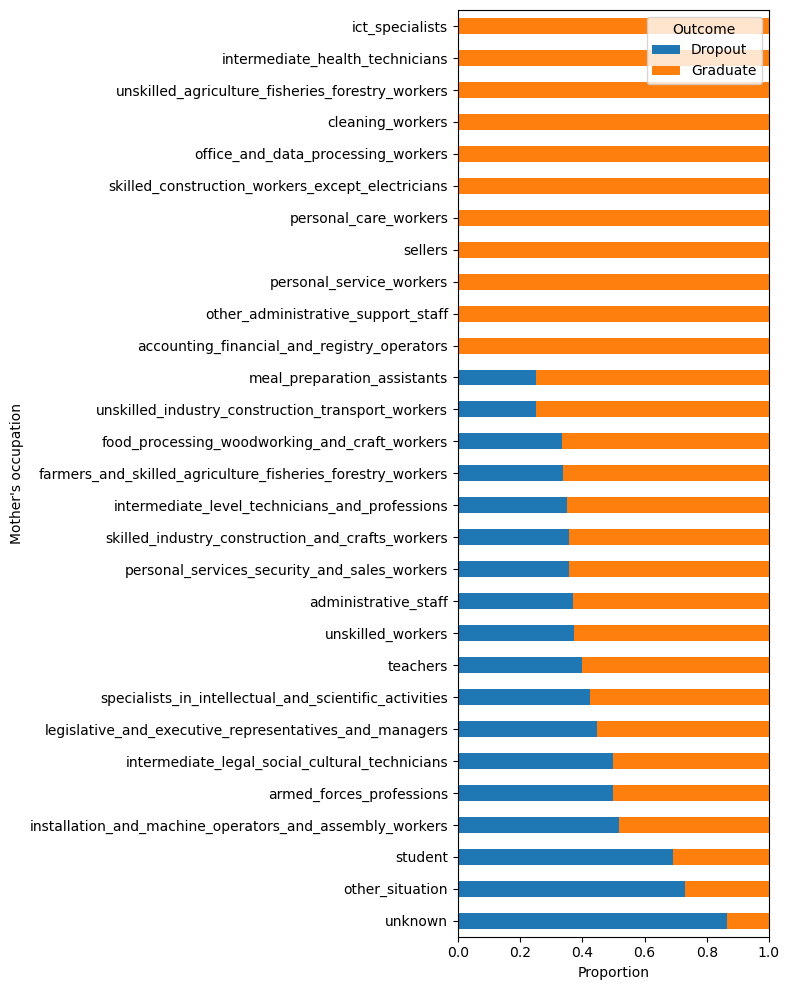

In [98]:
moth_table = (
    higher_model_df
    .groupby(["mother's_occupation", "target"])
    .size()
    .div(
        higher_model_df
        .groupby("mother's_occupation")
        .size(),
        level=0
    )
    .unstack(fill_value=0)
)

moth_table.index = moth_table.index.map(mp.OCCUPATION)

moth_table = moth_table.sort_values("Dropout", ascending=False)

ax = moth_table.plot(
    kind="barh",
    stacked=True,
    figsize=(8,10)
)

ax.set_xlabel("Proportion")
ax.set_ylabel("Mother's occupation")
ax.set_xlim(0, 1)
ax.legend(title="Outcome")

plt.tight_layout()
plt.show()

From these two graphs, we can see that mother's and father's occupation has little bearing or influence on the dropout rates of the students, for example:

> Traditionally higher earning fields like 'legislative and executive representatives and managers' is linked with a higher dropout rate compared to 'unskilled industry construction transport workers' for both mother's and father's occupation

> For both mother's and father's occupation, 'student' seems to present high up on the list for professions linked to higher dropout rates

> For both mother's and father's occupation, traditionally lower earning fields such as those related to 'industry', 'craft', 'construction', or 'transport' are actually linked to higher student success in graduation

Therefore, our hypothesis has been rejected.

#### Insight 4: Scholarship holders are more likely to graduate.

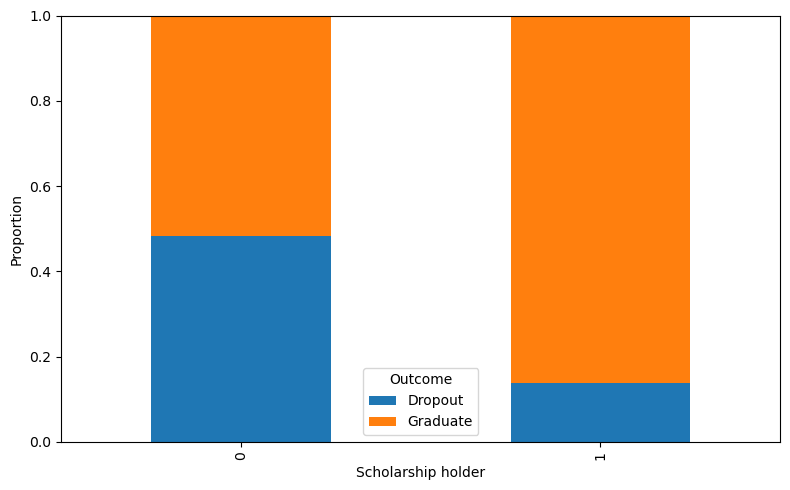

In [99]:
schol_table = (
    higher_model_df
    .groupby("scholarship_holder")["target"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

ax = schol_table.plot(
    kind="bar",
    stacked=True,
    figsize=(8,5)
)

ax.set_ylabel("Proportion")
ax.set_xlabel("Scholarship holder")
ax.set_ylim(0, 1)
ax.legend(title="Outcome")

plt.tight_layout()
plt.show()

From this graph, we can see that scholarship holders are much more likely to graduate than non-scholarship holders.

> ~50% of non-scholarship holders dropped out

> ~15% of scholarship holders dropped out

Therefore, our hypothesis has been accepted.

#### Insight 5: Gender has no influence on graduation likelihood.

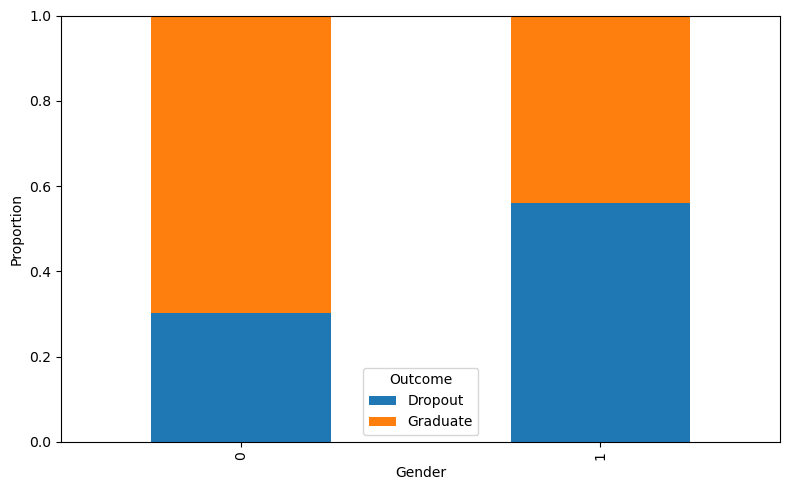

In [100]:
gen_table = (
    higher_model_df
    .groupby("gender")["target"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

ax = gen_table.plot(
    kind="bar",
    stacked=True,
    figsize=(8,5)
)

ax.set_ylabel("Proportion")
ax.set_xlabel("Gender")
ax.set_ylim(0, 1)
ax.legend(title="Outcome")

plt.tight_layout()
plt.show()

From this graph we can see that, a significantly lower proportion of women drop out when compared to their male peers.

> ~30% of women dropped out

> ~55% of men dropped out

Therefore, our hypothesis has been rejected